In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

In [3]:
diabet_df= pd.read_csv("diabetes.csv")

In [4]:
diabet_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabet_df.shape

(768, 9)

In [6]:
diabet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabet_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabet_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
diabet_df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
diabet_df.Outcome.value_counts(normalize= True)*100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

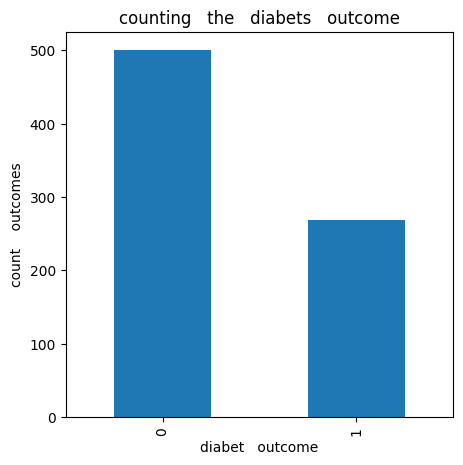

In [21]:
plt.figure(figsize=(5,5))
diabet_df['Outcome'].value_counts().plot(kind= 'bar')
plt.xlabel('diabet   outcome')
plt.ylabel('count    outcomes')
plt.title('counting   the   diabets   outcome')
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [37]:
x_train, x_test, y_train, y_test= train_test_split(diabet_df.iloc[:, 0:8], diabet_df.iloc[:, -1], test_size= 0.1, random_state= 40, stratify= diabet_df.iloc[:, -1])

In [38]:
print('x train shape:', x_train.shape)
print('x test shape:', x_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

x train shape: (691, 8)
x test shape: (77, 8)
y train shape: (691,)
y test shape: (77,)


In [32]:
print('the training y values', y_train.value_counts())
print('the testing y values', y_test.value_counts())

the training y values Outcome
0    450
1    241
Name: count, dtype: int64
the testing y values Outcome
0    50
1    27
Name: count, dtype: int64


In [39]:
lg= LogisticRegression()
lg.fit(x_train, y_train)
y_pred= lg.predict(x_test)

C:\Users\ravad\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
print('the accuracy score is:', accuracy_score(y_test, y_pred))

the accuracy score is: 0.7662337662337663


In [41]:
confusion_matrix(y_test, y_pred)

array([[44,  6],
       [12, 15]], dtype=int64)

<Axes: >

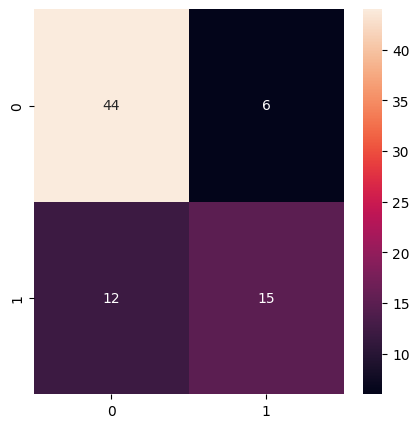

In [43]:
plt.figure(figsize=(5,5))
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        50
           1       0.71      0.56      0.62        27

    accuracy                           0.77        77
   macro avg       0.75      0.72      0.73        77
weighted avg       0.76      0.77      0.76        77

